# Polynomial Regression

## Dataset:Position_salary.csv

In [16]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

 

In [17]:
df=pd.read_csv('C:/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [18]:
df.shape

(10, 3)

In [26]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [19]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [21]:
df.describe

<bound method NDFrame.describe of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>

In [22]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [23]:
 
 #Independent variable (Position Level)
X = df.iloc[:, 1:-1].values
 
# Dependent variable (Salary)
y = df.iloc[:, -1].values

In [24]:
# Training the Linear Regression model on the whole dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)
 

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
# Training the Polynomial Regression model on the whole dataset
print("Models Trained Successfully!")

Models Trained Successfully!


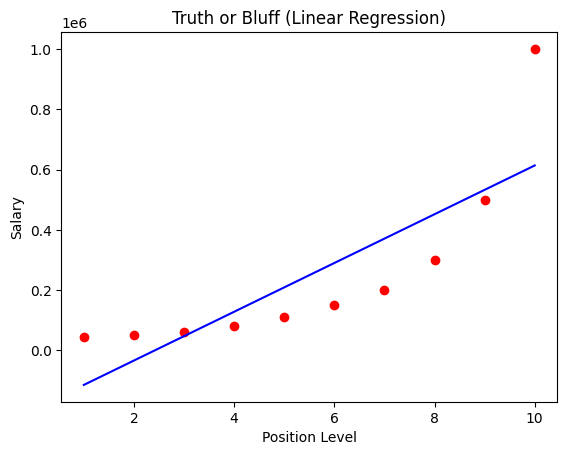

In [32]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
 

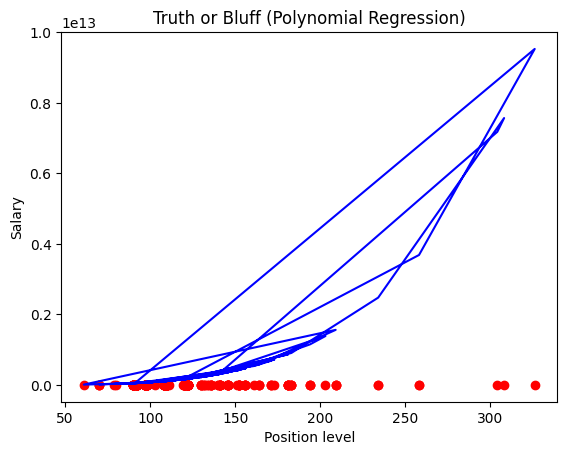

In [97]:

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 

In [98]:

# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 

TypeError: arange() not supported for inputs with DType <class 'numpy.dtypes.StrDType'>.

In [35]:

# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("Linear Regression Prediction for Level 6.5:", linear_prediction)
 
 
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)
 

Linear Regression Prediction for Level 6.5: [330378.78787879]
Polynomial Regression Prediction for Level 6.5: [158862.45265155]


## Dataset:Car Price Prediction

Business Scenario

An automobile company wants to understand how engine size affects the price of a car.

From past observations, the product team believes:

For small engines, price increases slowly

For medium engines, price increases rapidly

For very large engines, price growth slows down due to luxury saturation

This indicates that the relationship between engine size and price is not strictly linear.

You are hired as a Data Analyst to analyze this pattern and build a model that can predict car prices 
accurately.

### Tasks

Load the dataset and identify the relevant columns.

Use:

Engine size as the input feature

Car price as the output variable

Visualize the relationship between engine size and price.

Build a predictive model to estimate car price based on engine size.

Predict the price for a car with:

Engine size = 200

### 1.Load the dataset and identify the relevant columns.

In [36]:
df=pd.read_csv('C:/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [38]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [39]:
df.shape

(205, 26)

In [40]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### 2. Use:Engine size as the input feature and Car price as the output variable

In [46]:
X=df[["enginesize"]]
y=df["price"]

### 3. Visualize the relationship between engine size and price.

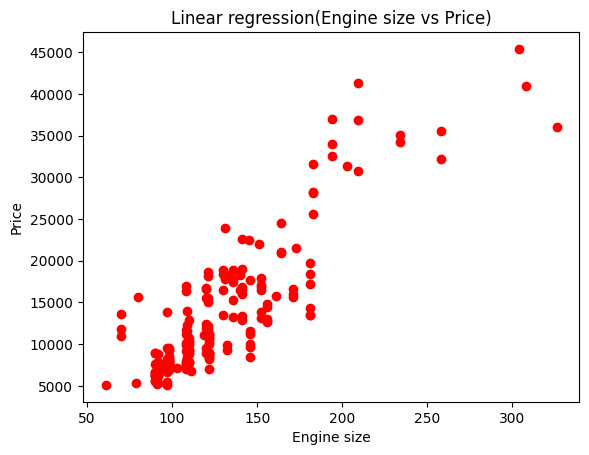

In [53]:
plt.scatter(X,y,color="red")
plt.title("Linear regression(Engine size vs Price)")
plt.xlabel("Engine size")
plt.ylabel("Price")
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### 4. Build a predictive model to estimate car price based on engine size.

In [65]:
model=LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [66]:
y_pred=model.predict(X_test)


### 5. Predict the price for a car with: Engine size = 200

In [67]:
engine_s=[[200]]
m=model.predict(engine_s)
print("Predict the price for a car with: Engine size = 200 is ",float(m[0]))

Predict the price for a car with: Engine size = 200 is  25427.147445039864


C:\Users\Varsha\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 6. Increase the flexibility of your model and observe how the curve changes.

In [75]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)


### 7. Compare predictions from: a simple straight-line model and a curved model

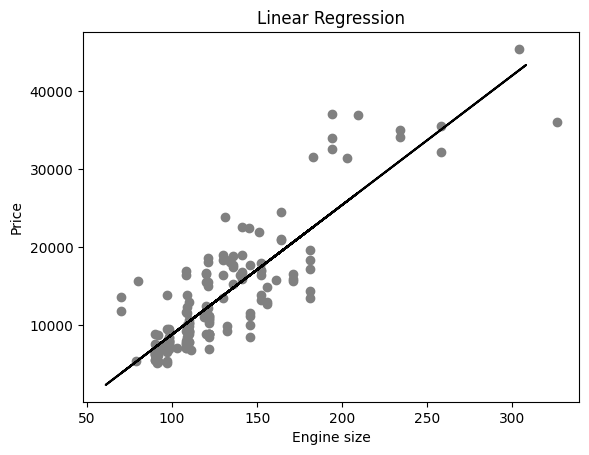

In [110]:
plt.scatter(X_train,y_train,color="grey")
plt.plot(X_test,y_pred,color="black")
plt.title("Linear Regression")
plt.xlabel("Engine size")
plt.ylabel("Price")
plt.show()

C:\Users\Varsha\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


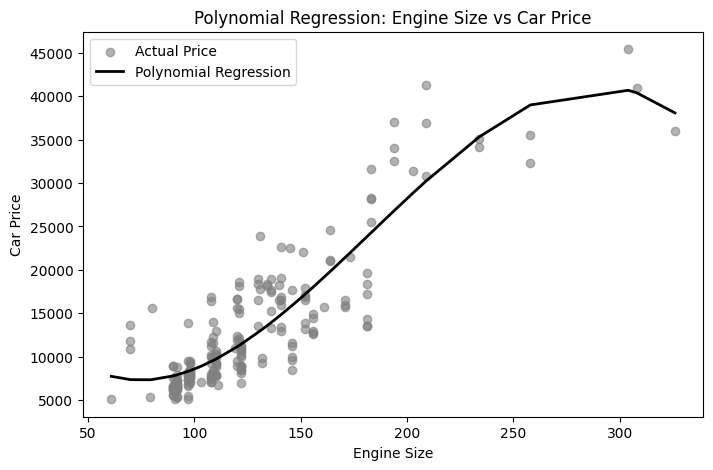

In [114]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Price')
plt.plot(X_sorted, poly_model.predict(X_sorted), color='black', linewidth=2, label='Polynomial Regression')
plt.title('Polynomial Regression: Engine Size vs Car Price')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.legend()
plt.show()


### 9. Evaluate prediction errors and interpret them in business terms.

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Linear model errors
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# Polynomial model errors
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("Linear Model - MAE:", mae_linear, "RMSE:", rmse_linear, "R²:", r2_linear)
print("Polynomial Model - MAE:", mae_poly, "RMSE:", rmse_poly, "R²:", r2_poly)


Linear Model - MAE: 2748.6947032901094 RMSE: 3932.614774664367 R²: 0.8040958796678975
Polynomial Model - MAE: 2348.8434416443756 RMSE: 3409.015907135493 R²: 0.8527894915205994


## Overfitting and Underfitting

In [122]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [123]:
print(r2_score(y_train,train_pred))

0.7507055061579612


In [124]:
print(r2_score(y_test,test_pred))

0.8040958796678975


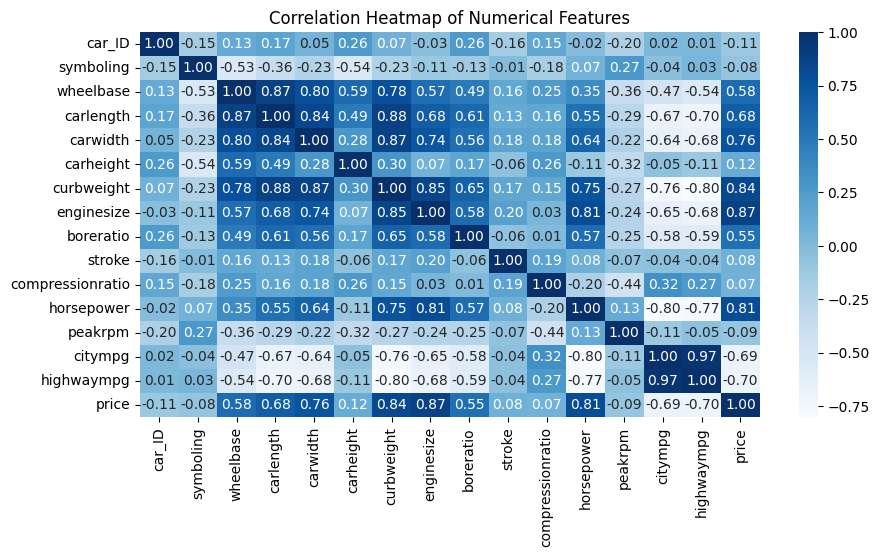

In [ ]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(10,5))
corr_matrix = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [140]:
np.abs(corr_matrix)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,0.033930,0.260064,0.160824,0.150276,0.015006,0.203789,0.015940,0.011255,0.109093
symboling,0.151621,1.000000,0.531954,0.357612,0.232919,0.541038,0.227691,0.105790,0.130051,0.008735,0.178515,0.070873,0.273606,0.035823,0.034606,0.079978
wheelbase,0.129729,0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,0.360469,0.470414,0.544082,0.577816
carlength,0.170636,0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,0.287242,0.670909,0.704662,0.682920
carwidth,0.052387,0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,0.220012,0.642704,0.677218,0.759325
carheight,0.255960,0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,0.055307,0.261214,0.108802,0.320411,0.048640,0.107358,0.119336
curbweight,0.071962,0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,0.266243,0.757414,0.797465,0.835305
enginesize,0.033930,0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,0.244660,0.653658,0.677470,0.874145
boreratio,0.260064,0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,0.055909,0.005197,0.573677,0.254976,0.584532,0.587012,0.553173
stroke,0.160824,0.008735,0.160959,0.129533,0.182942,0.055307,0.168790,0.203129,0.055909,1.000000,0.186110,0.080940,0.067964,0.042145,0.043931,0.079443


### Heatmap Insights

1. Strong positive: Engine size, horsepower, curb weight → higher price

2. Moderate positive: Wheelbase, car length, car width → moderately higher price

3. Negative: City mpg, highway mpg → more efficient cars cost less

4. Weak: Symboling, car height, stroke, compression ratio, peak rpm → little effect on price

Weak Positive Correlation with Price (close to 0, but > 0)

carheight (≈ 0.12)

symboling (≈ 0.08)

peakrpm (≈ 0.085)

stroke (≈ 0.08)

compressionratio (≈ 0.07)

Weak Negative Correlation with Price (close to 0, but < 0)

None strongly negative but closest weak negatives could be:

citympg (≈ -0.69) — actually moderate negative

highwaympg (≈ -0.70) — moderate negative

For strictly weak negatives, nothing is very close to zero but negative; most negatives are moderate or strong.

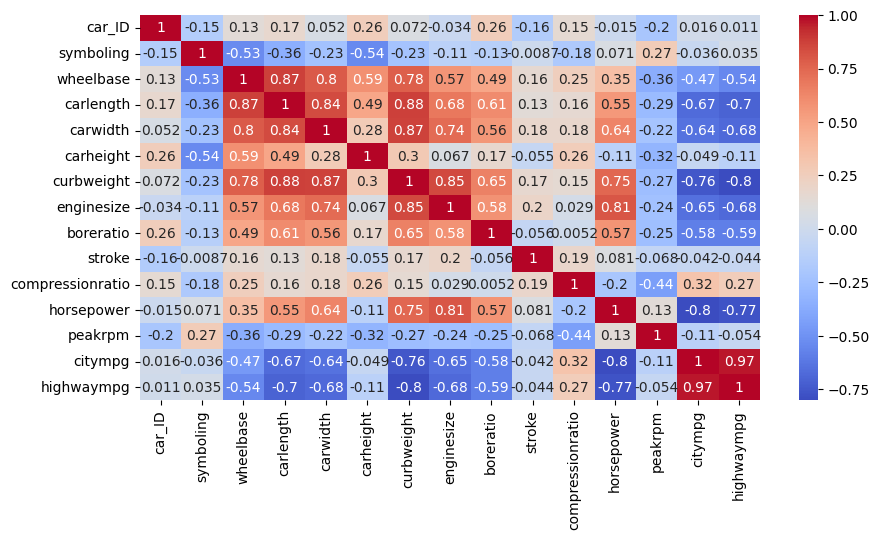

In [142]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

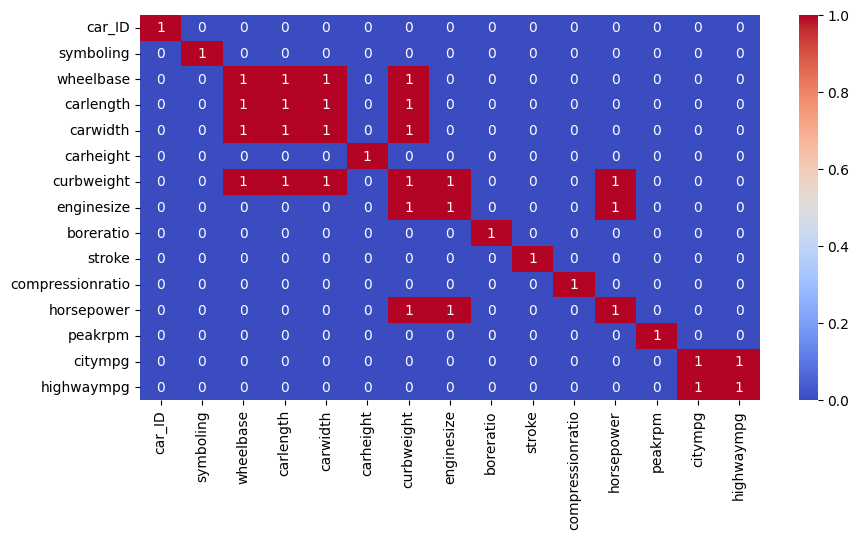

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')
plt.show()

#### Feature–Feature correlations > 0.75 are:

Highly correlated pairs (> 0.75):

wheelbase ↔ carlength (≈ 0.87)

wheelbase ↔ carwidth (≈ 0.80)

wheelbase ↔ curbweight (≈ 0.78)

carlength ↔ carwidth (≈ 0.84)

carlength ↔ curbweight (≈ 0.88)

carwidth ↔ curbweight (≈ 0.87)

curbweight ↔ enginesize (≈ 0.85)

enginesize ↔ horsepower (≈ 0.81)

citympg ↔ highwaympg (≈ 0.97)

Unique columns involved:

wheelbase

carlength

carwidth

curbweight

enginesize

horsepower

citympg

highwaympg

#### feature–target correlations > 0.75 are:

Columns with correlation > 0.75 with target (price):

curbweight

enginesize

horsepower

carwidth

carlength

wheelbase

Feature–feature correlations > 0.75, and

feature–target (price) correlations > 0.75

are:

Common Features

wheelbase

carlength

carwidth

curbweight

enginesize

horsepower

In [153]:
# drop highly correlated features
cols_to_drop = ['wheelbase', 'carlength', 'carwidth' ,'curbweight','enginesize','horsepower']
df_reduced = df.drop(columns=cols_to_drop)

In [154]:
df_reduced.shape

(205, 20)

In [162]:
from sklearn.linear_model import Ridge, Lasso,RidgeCV
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
print("Ridge Predictions:", ridge_model.predict(X_test))

# Lasso Regression
lasso_model = Lasso(alpha=1.0
                    )
lasso_model.fit(X_train, y_train)
print("Lasso Predictions:", lasso_model.predict(X_test))

Ridge Predictions: [26919.69720189 13983.86977967 12159.58642525 12325.43036656
 22607.75472782  8345.17577511 10501.14701215  8511.01971642
 10169.45912953  8345.17577511 14813.08948622  8511.01971642
 15476.46525146 12491.27430787 43338.24739163  7515.95606856
  2374.79388793 18129.96831243 12491.27430787 10169.45912953
 12491.27430787 22276.06684519  8345.17577511  7515.95606856
  7184.26818594 26919.69720189 16471.52889933 15642.30919277
  8345.17577511 15642.30919277 22607.75472782  7184.26818594
  7515.95606856 20949.31531471  8511.01971642 22607.75472782
 10169.45912953  3867.38935973  7184.26818594 18129.96831243
 10169.45912953]
Lasso Predictions: [26919.69777234 13983.86981134 12159.58638094 12325.43032916
 22607.75511867  8345.17557193 10501.14689876  8511.01952015
 10169.45900233  8345.17557193 14813.08955243  8511.01952015
 15476.4653453  12491.27427738 43338.24864591  7515.95583084
  2374.79343609 18129.96851679 12491.27427738 10169.45900233
 12491.27427738 22276.06722224

In [177]:

from sklearn.linear_model import RidgeCV
model=RidgeCV(alphas=alphas)
alphas=np.arange(1,50,0.05)
model.fit(X_train, y_train)
 

,"alphas alphas: array-like of shape (n_alphas,), default=(0.1, 1.0, 10.0)Array of alpha values to try.Regularization strength; must be a positive float. Regularizationimproves the conditioning of the problem and reduces the variance ofthe estimates. Larger values specify stronger regularization.Alpha corresponds to ``1 / (2C)`` in other linear models such as:class:`~sklearn.linear_model.LogisticRegression` or:class:`~sklearn.svm.LinearSVC`.If using Leave-One-Out cross-validation, alphas must be strictly positive.","array([0.1 , ..., 9.9 , 9.95])"
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"scoring scoring: str, callable, default=NoneThe scoring method to use for cross-validation. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)``. See :ref:`scoring_callable` for details.- `None`: negative :ref:`mean squared error ` if cv is None (i.e. when using leave-one-out cross-validation), or :ref:`coefficient of determination ` (:math:`R^2`) otherwise.",None
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the efficient Leave-One-Out cross-validation- integer, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if ``y`` is binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used, else,:class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.",None
,"gcv_mode gcv_mode: {'auto', 'svd', 'eigen'}, default='auto'Flag indicating which strategy to use when performingLeave-One-Out Cross-Validation. Options are:: 'auto' : use 'svd' if n_samples > n_features, otherwise use 'eigen' 'svd' : force use of singular value decomposition of X when X is dense, eigenvalue decomposition of X^T.X when X is sparse. 'eigen' : force computation via eigendecomposition of X.X^TThe 'auto' mode is the default and is intended to pick the cheaperoption of the two depending on the shape of the training data.",None
,"store_cv_results store_cv_results: bool, default=FalseFlag indicating if the cross-validation values corresponding toeach alpha should be stored in the ``cv_results_`` attribute (seebelow). This flag is only compatible with ``cv=None`` (i.e. usingLeave-One-Out Cross-Validation)... versionchanged:: 1.5 Parameter name changed from `store_cv_values` to `store_cv_results`.",False
,"alpha_per_target alpha_per_target: bool, default=FalseFlag indicating whether to optimize the alpha value (picked from the`alphas` parameter list) for each target separately (for multi-outputsettings: multiple prediction targets). When set to `True`, afterfitting, the `alpha_` attribute will contain a value for each target.When set to `False`, a single alpha is used for all targets... versionadded:: 0.24",False


In [ ]:
from sklearn.linear_model import RidgeCV
import numpy as np
model=RidgeCV(alphas=alphas)
alphas=np.arange(0.1,10,0.05)
model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))

Best alpha: 9.950000000000003
best score:  0.8040933847320628


In [181]:

from sklearn.linear_model import LassoCV
model=LassoCV(alphas=alphas)
alphas=np.arange(0.1,10,0.05)
model.fit(X_train, y_train)
 

,"eps eps: float, default=1e-3Length of the path. ``eps=1e-3`` means that``alpha_min / alpha_max = 1e-3``.",0.001
,"n_alphas n_alphas: int, default=100Number of alphas along the regularization path... deprecated:: 1.7 `n_alphas` was deprecated in 1.7 and will be removed in 1.9. Use `alphas` instead.",'deprecated'
,"alphas alphas: array-like or int, default=NoneValues of alphas to test along the regularization path.If int, `alphas` values are generated automatically.If array-like, list of alpha values to use... versionchanged:: 1.7 `alphas` accepts an integer value which removes the need to pass `n_alphas`... deprecated:: 1.7 `alphas=None` was deprecated in 1.7 and will be removed in 1.9, at which point the default value will be set to 100.","array([0.1 , ..., 9.9 , 9.95])"
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: 'auto', bool or array-like of shape (n_features, n_features), default='auto'Whether to use a precomputed Gram matrix to speed upcalculations. If set to ``'auto'`` let us decide. The Grammatrix can also be passed as argument.",'auto'
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``.",0.0001
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"cv cv: int, cross-validation generator or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- int, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For int/None inputs, :class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: bool or int, default=FalseAmount of verbosity.",False
,"n_jobs n_jobs: int, default=NoneNumber of CPUs to use during the cross validation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [183]:

# Best alpha selected
print("Best alpha:", model.alpha_)

print("best score: ",model.score(X_test,y_test))
# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Inspect coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Best alpha: 9.950000000000003
best score:  0.8040934124003777
Mean Squared Error: 15465653.74192707
R^2 Score: 0.8040934124003777
Model coefficients: [165.83844985]
Model intercept: -7740.9923306792225
